In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [ ]:
df = pd.read_csv("df_season.csv")
base_df = df.copy()

## Feature extraction and selection

In [ ]:
columnas = df.columns.tolist()
print(columnas)

['ID', 'Player', 'Age', 'Season', 'Market Value', 'Club', 'Nationality', 'Position', 'days_injured', 'injuries', 'games_missed', 'premier_league_appearances', 'premier_league_goals', 'premier_league_assists', 'premier_league_own_goals', 'premier_league_substitutions_on', 'premier_league_substitutions_off', 'premier_league_yellow_cards', 'premier_league_second_yellow_cards', 'premier_league_red_cards', 'premier_league_penalty_goals', 'premier_league_minutes_per_goal', 'premier_league_minutes_played', 'laliga_appearances', 'laliga_goals', 'laliga_assists', 'laliga_own_goals', 'laliga_substitutions_on', 'laliga_substitutions_off', 'laliga_yellow_cards', 'laliga_second_yellow_cards', 'laliga_red_cards', 'laliga_penalty_goals', 'laliga_minutes_per_goal', 'laliga_minutes_played', 'bundesliga_appearances', 'bundesliga_goals', 'bundesliga_assists', 'bundesliga_own_goals', 'bundesliga_substitutions_on', 'bundesliga_substitutions_off', 'bundesliga_yellow_cards', 'bundesliga_second_yellow_cards',

Aggregation of the columns to not differenciate by league

In [ ]:
def aggregation(df, columns):
  cols = df.filter(like=columns)
  df[columns] = cols.sum(axis=1)
  df = df.drop(cols, axis=1)
  return df

In [ ]:
aggs = ["appearances", "own_goals", "assists", "substitutions_on", "substitutions_off", "second_yellow_cards", "red_cards", "penalty_goals", "minutes_per_goal", "minutes_played"]
for i in aggs:
  df = aggregation(df, i)

In [ ]:
df.head()

,ID,Player,Age,Season,Market Value,Club,Nationality,Position,days_injured,injuries,...,appearances,own_goals,assists,substitutions_on,substitutions_off,second_yellow_cards,red_cards,penalty_goals,minutes_per_goal,minutes_played
0,1005649,Murillo,20,22/23,500000.0,Sport Club Corinthians Paulista,['Brazil'],Defender - Centre-Back,0,0,...,31.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,1544.0
1,1005649,Murillo,21,23/24,22800000.0,Nottingham Forest,['Brazil'],Defender - Centre-Back,0,0,...,36.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,372.0
2,1005649,Murillo,22,24/25,40000000.0,Nottingham Forest,['Brazil'],Defender - Centre-Back,0,0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1056993,Estêvão,16,23/24,10000000.0,SE Palmeiras U17,['Brazil'],Attack - Right Winger,0,0,...,48.0,0.0,12.0,12.0,30.0,0.0,0.0,6.0,819.0,1025.0
4,1056993,Estêvão,17,24/25,40000000.0,Sociedade Esportiva Palmeiras,['Brazil'],Attack - Right Winger,45,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df["goals"] = df["premier_league_goals"] + df["laliga_goals"] + df["bundesliga_goals"] + df["serie_a_goals"] + df["ligue_1_goals"] + df["uefa_champions_league_goals"] + df["europa_league_goals"]+ df["other_competitions_goals"]
df = df.drop(["premier_league_goals", "laliga_goals", "bundesliga_goals", "serie_a_goals", "ligue_1_goals", "uefa_champions_league_goals", "europa_league_goals", "other_competitions_goals"], axis=1)

In [ ]:
df["yellow_cards"] = df["premier_league_yellow_cards"] + df["laliga_yellow_cards"] + df["bundesliga_yellow_cards"] + df["serie_a_yellow_cards"] + df["ligue_1_yellow_cards"] + df["uefa_champions_league_yellow_cards"] + df["europa_league_yellow_cards"]+ df["other_competitions_yellow_cards"]
df = df.drop(["premier_league_yellow_cards", "laliga_yellow_cards", "bundesliga_yellow_cards", "serie_a_yellow_cards", "ligue_1_yellow_cards", "uefa_champions_league_yellow_cards", "europa_league_yellow_cards", "other_competitions_yellow_cards"], axis=1)

In [ ]:
df.columns

Index(['ID', 'Player', 'Age', 'Season', 'Market Value', 'Club', 'Nationality',
       'Position', 'days_injured', 'injuries', 'games_missed', 'appearances',
       'own_goals', 'assists', 'substitutions_on', 'substitutions_off',
       'second_yellow_cards', 'red_cards', 'penalty_goals', 'minutes_per_goal',
       'minutes_played', 'goals', 'yellow_cards'],
      dtype='object')

Delete duplicated seasons

In [ ]:
df = df.groupby(['Player', 'Season']).agg({
    'ID': 'first',
    'Position': 'first',
    'Nationality': 'first',
    'Market Value': 'mean',
    'Club': 'first',
    'Age': 'first',
    'days_injured': 'first',
    'injuries': 'first',
    'games_missed': 'first',
    'appearances': 'first',
    'own_goals': 'first',
    'assists': 'first',
    'substitutions_on': 'first',
    'substitutions_off': 'first',
    'second_yellow_cards': 'first',
    'red_cards': 'first',
    'penalty_goals': 'first',
    'minutes_per_goal': 'first',
    'minutes_played': 'first',
    'goals': 'first',
    'yellow_cards': 'first',
}).reset_index()

In [ ]:
df.shape

(1750, 23)

Adding new interesting features

In [ ]:
# mean of goals in the last 3 seasons
df['mean_goals'] = df.groupby('Player')['goals'].transform(lambda x: x.rolling(3, min_periods=1).mean())
# difference of goals with respect the previous season
df['goals_diff'] = df.groupby('Player')['goals'].diff().fillna(0)
df['Market_Value_normalizada'] = (df['Market Value'] - df['Market Value'].min()) / (df['Market Value'].max() - df['Market Value'].min())

Check null values

In [ ]:
df.isnull().sum()

,0
Player,0
Season,0
ID,0
Position,0
Nationality,0
Market Value,0
Club,0
Age,0
days_injured,0
injuries,0


Converting to list Nationality column and getting one nationality for the visualization task

In [ ]:
df['Nationality'] = df['Nationality'].apply(ast.literal_eval)

distinct_countries = set(country for nationalities in df['Nationality'] for country in nationalities)

distinct_countries = list(distinct_countries)

print(distinct_countries)

['England', 'Colombia', 'Uruguay', 'Argentina', 'Korea, South', 'Algeria', 'Netherlands', 'Togo', 'Ghana', 'Japan', 'Mexico', 'Equatorial Guinea', 'Egypt', 'Guinea', 'St. Kitts & Nevis', 'Angola', 'Dominican Republic', 'Nigeria', 'Norway', 'Belgium', 'Slovakia', 'United States', 'Mali', 'French Guiana', 'Croatia', 'Curacao', "Cote d'Ivoire", 'Congo', 'Slovenia', 'Ireland', 'Türkiye', 'France', 'Eritrea', 'Ecuador', 'North Macedonia', 'Martinique', 'Benin', 'Switzerland', 'Morocco', 'Denmark', 'Liberia', 'Ukraine', 'Germany', 'Portugal', 'Wales', 'Jamaica', 'Burkina Faso', 'Senegal', 'Spain', 'Suriname', 'Italy', 'Brazil', 'Georgia', 'Guadeloupe', 'The Gambia', 'Guinea-Bissau', 'Sweden', 'Hungary', 'Scotland', 'Canada', 'DR Congo', 'Barbados', 'Serbia', 'Cameroon']


In [ ]:
df['Nationality'] = df['Nationality'].apply(lambda x: x[0])

In [ ]:
df

,Player,Season,ID,Position,Nationality,Market Value,Club,Age,days_injured,injuries,...,second_yellow_cards,red_cards,penalty_goals,minutes_per_goal,minutes_played,goals,yellow_cards,mean_goals,goals_diff,Market_Value_normalizada
0,Achraf Hakimi,16/17,398073,Defender - Right-Back,Morocco,250000.0,Real Madrid Castilla,17,0,0,...,1.0,1.0,0.0,540.0,540.0,2.0,9.0,2.000000,0.0,0.00125
1,Achraf Hakimi,17/18,398073,Defender - Right-Back,Morocco,5000000.0,Real Madrid,19,0,0,...,0.0,0.0,0.0,379.0,1316.0,2.0,0.0,2.000000,0.0,0.02500
2,Achraf Hakimi,18/19,398073,Defender - Right-Back,Morocco,19250000.0,Borussia Dortmund,19,66,1,...,0.0,0.0,0.0,1110.0,610.0,3.0,5.0,2.333333,1.0,0.09625
3,Achraf Hakimi,19/20,398073,Defender - Right-Back,Morocco,53000000.0,Borussia Dortmund,21,0,0,...,0.0,0.0,0.0,721.0,856.0,9.0,5.0,4.666667,6.0,0.26500
4,Achraf Hakimi,20/21,398073,Defender - Right-Back,Morocco,50000000.0,Inter Milan,21,5,2,...,0.0,0.0,0.0,381.0,544.0,7.0,9.0,6.333333,-2.0,0.25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,Éderson,19/20,607854,Midfield - Central Midfield,Brazil,2100000.0,Cruzeiro Esporte Clube,20,0,0,...,0.0,0.0,0.0,264.0,1253.0,3.0,2.0,2.500000,1.0,0.01050
1746,Éderson,20/21,607854,Midfield - Central Midfield,Brazil,4700000.0,Sport Club Corinthians Paulista,21,0,0,...,0.0,0.0,0.0,813.0,1959.0,3.0,11.0,2.666667,0.0,0.02350
1747,Éderson,21/22,607854,Midfield - Central Midfield,Brazil,5000000.0,Fortaleza Esporte Clube,22,0,0,...,0.0,0.0,0.0,576.0,0.0,2.0,5.0,2.666667,-1.0,0.02500
1748,Éderson,22/23,607854,Midfield - Central Midfield,Brazil,20000000.0,Atalanta BC,23,16,1,...,0.0,0.0,0.0,0.0,68.0,1.0,5.0,2.000000,-1.0,0.10000


## Exploratory Data Analysis

<ipython-input-18-c87264a8fc36>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Season'] = pd.Categorical(df_top['Season'], categories=custom_order, ordered=True)


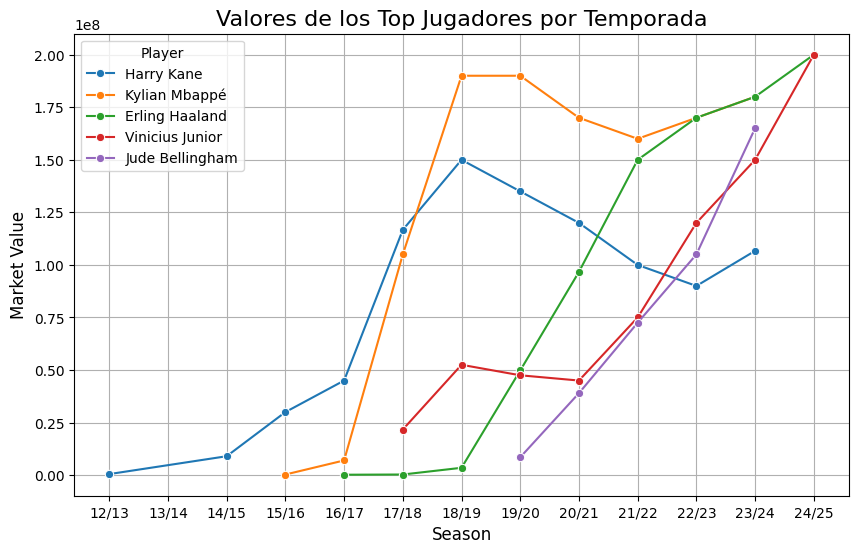

In [ ]:
top_jugadores = df.groupby('Player')['Market Value'].max().nlargest(5).index
df_top = df[df['Player'].isin(top_jugadores)]

custom_order = ['11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19', '19/20', '20/21', '21/22', '22/23', '23/24', '24/25']

df_top['Season'] = pd.Categorical(df_top['Season'], categories=custom_order, ordered=True)

df_top = df_top.sort_values(by='Season')

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top, x='Season', y='Market Value', hue='Player', marker='o')

plt.title('Valores de los Top Jugadores por Temporada', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Market Value', fontsize=12)
plt.legend(title='Player')
plt.grid(True)

plt.show()

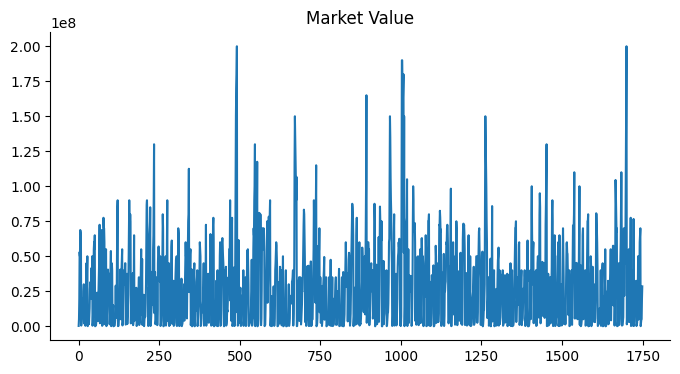

In [ ]:
df['Market Value'].plot(kind='line', figsize=(8, 4), title='Market Value')
plt.gca().spines[['top', 'right']].set_visible(False)

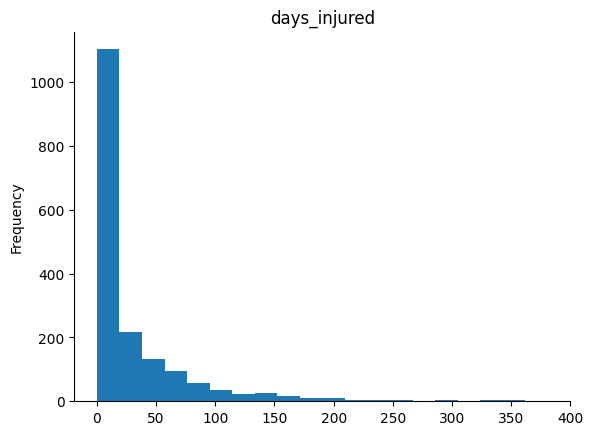

In [ ]:
df['days_injured'].plot(kind='hist', bins=20, title='days_injured')
plt.gca().spines[['top', 'right',]].set_visible(False)

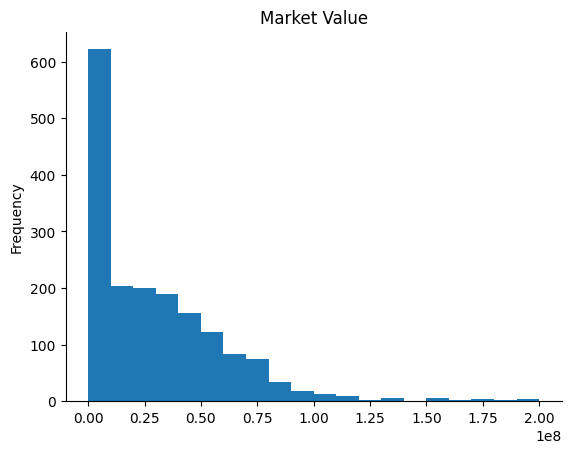

In [ ]:
df['Market Value'].plot(kind='hist', bins=20, title='Market Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

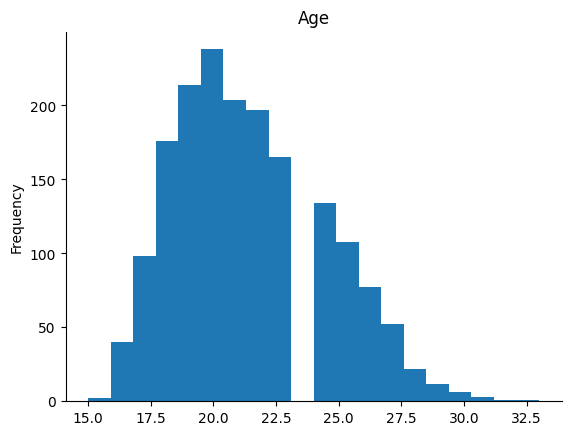

In [ ]:
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

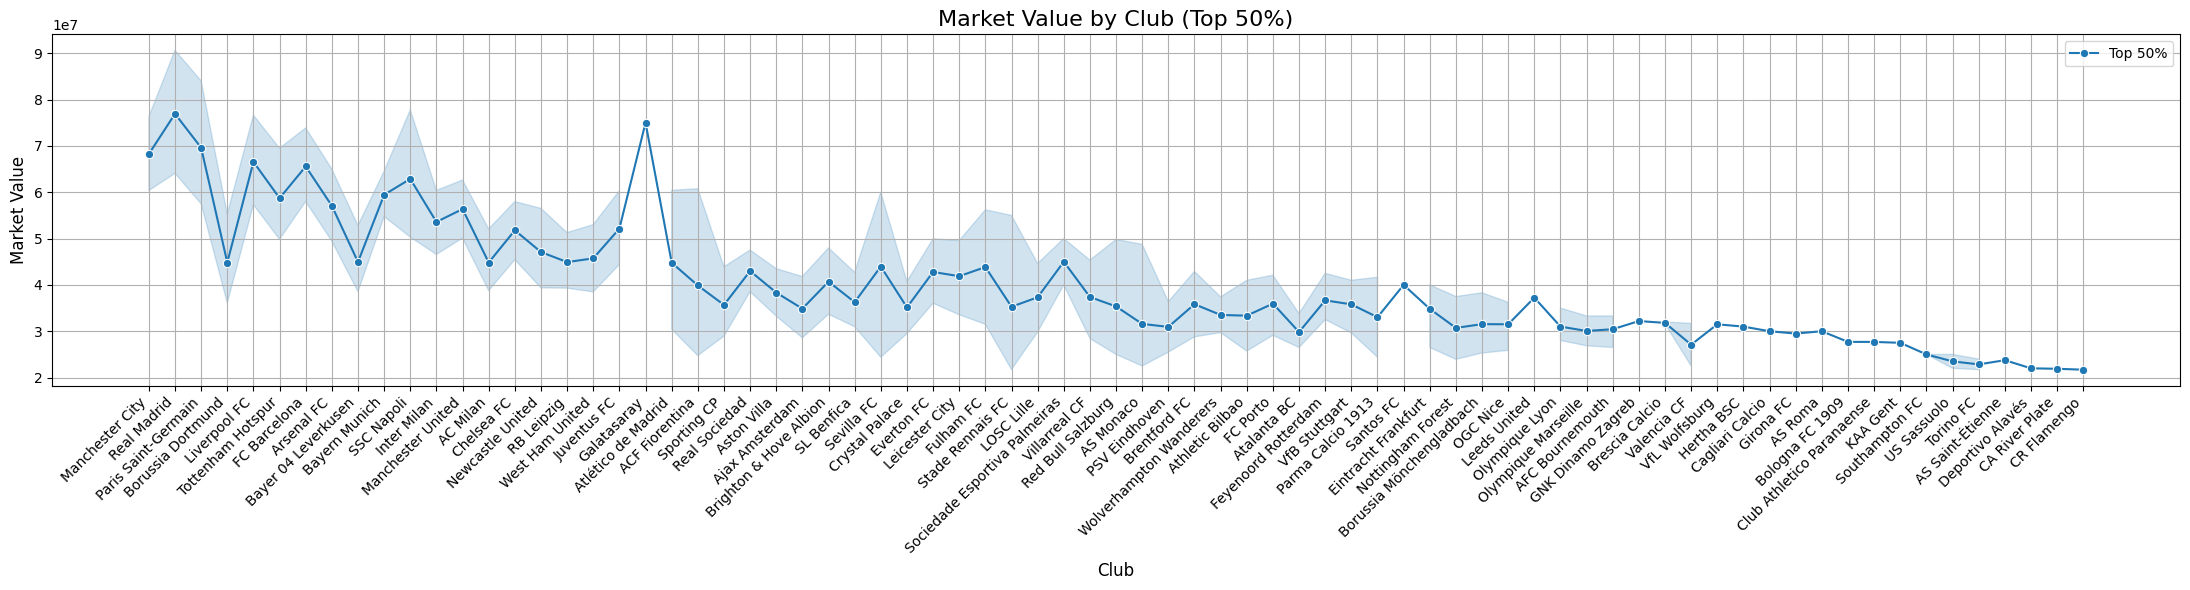

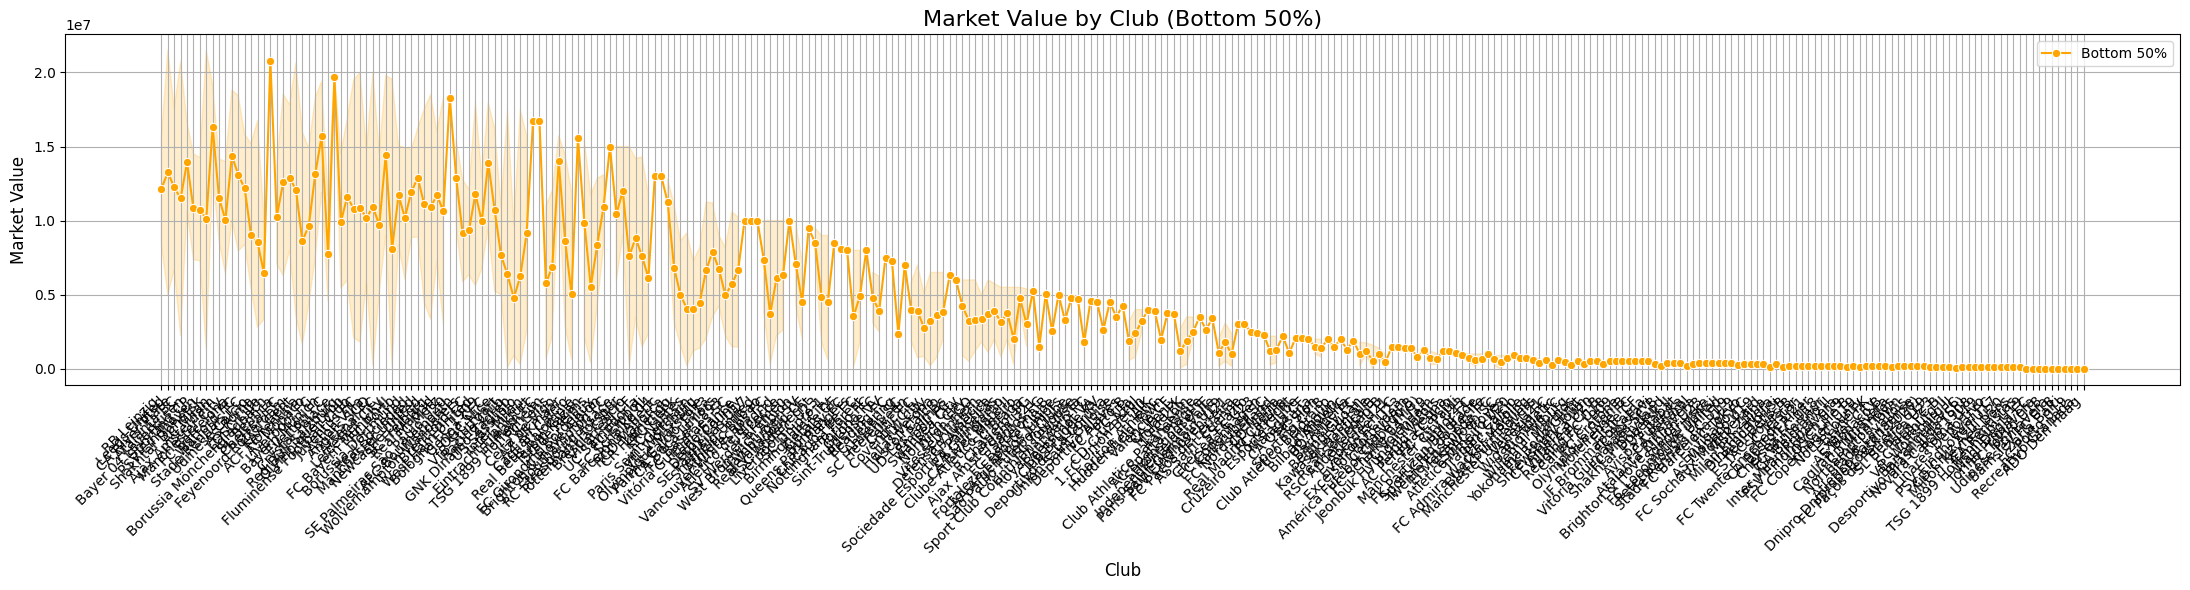

In [ ]:
df_sorted = df.sort_values(by='Market Value', ascending=False).reset_index(drop=True)

midpoint = len(df_sorted['Club']) // 2
top_50_df = df_sorted.iloc[:midpoint]
bottom_50_df = df_sorted.iloc[midpoint:]

plt.figure(figsize=(22, 6))
sns.lineplot(data=top_50_df, x='Club', y='Market Value', marker='o', label='Top 50%')
plt.title('Market Value by Club (Top 50%)', fontsize=16)
plt.xlabel('Club', fontsize=12)
plt.ylabel('Market Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


plt.figure(figsize=(22, 6))
sns.lineplot(data=bottom_50_df, x='Club', y='Market Value', marker='o', label='Bottom 50%', color='orange')
plt.title('Market Value by Club (Bottom 50%)', fontsize=16)
plt.xlabel('Club', fontsize=12)
plt.ylabel('Market Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
df.to_csv('df_season_clean_agg.csv', index=False)